In [1]:
from scipy import stats
from scipy.stats import pearsonr, kendalltau

srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc0 = pearsonr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc1 = kendalltau( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])

srcc[0],srcc0[0],srcc1[0]

(-0.3369615411989142, -0.31079259594045033, -0.23766989273624328)

In [2]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


NVIDIA GeForce GTX 1050
True


In [3]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [4]:
from test_DistillationIQA_single import DistillationIQASolver


obj_org = DistillationIQASolver(net_mode="org",student_address='./model_zoo/NAR_student_cross_dataset.pth')

normal mode...
>>>>>  ./model_zoo/NAR_student_cross_dataset.pth


In [5]:
obj_stackV1 = DistillationIQASolver(net_mode="stackingV1",student_address='./model_zoo/stacking_ep98_saved_student_model.pth')

stacking modeV1...
>>>>>  ./model_zoo/stacking_ep98_saved_student_model.pth


In [6]:
obj_stackV2 = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/stackingV2-ep70.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/stackingV2-ep70.pth


In [7]:
obj_4loss = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/4loss_ep+26_5.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/4loss_ep+26_5.pth


In [32]:
orgs = []
v1s = []
v2s = []

for i in range(10):
    orgs.append(obj_org.cvr_on_single_image("tst_imgs/56.bmp" , "tst_imgs/0806.png"))
    v1s.append(obj_stackV1.cvr_on_single_image("tst_imgs/56.bmp" , "tst_imgs/0806.png"))
    v2s.append(obj_stackV2.cvr_on_single_image("tst_imgs/56.bmp" , "tst_imgs/0806.png"))

import numpy as np

var_orgs = np.var(orgs)
var_v1s = np.var(v1s)
var_v2s = np.var(v2s)

print("Variance of orgs:", var_orgs)
print("Variance of v1s:", var_v1s)
print("Variance of v2s:", var_v2s)


Variance of orgs: 0.03613990554989868
Variance of v1s: 0.0409258435569518
Variance of v2s: 0.08517473652612809


motorcycle_blur:
    Variance of orgs: 0.0010382746971259848
    Variance of v1s: 0.0017583543566212253
    Variance of v2s: 0.001916467050202755

motorcycle_salt:
    Variance of orgs: 0.000817276903186818
    Variance of v1s: 0.000967653842940024
    Variance of v2s: 0.0006215323998933147

hats_blur:
    Variance of orgs: 0.03613990554989868
    Variance of v1s: 0.0409258435569518
    Variance of v2s: 0.08517473652612809

hats_salt:
    Variance of orgs: 0.00103193418425235
    Variance of v1s: 0.0006089566539094449
    Variance of v2s: 0.0009893813532789865

In [18]:
v2s

[2.9152231216430664,
 2.7039475440979004,
 2.7919840812683105,
 2.957883358001709,
 2.698899030685425,
 2.392042398452759,
 2.9161503314971924,
 2.663569450378418,
 2.855070114135742,
 2.5412402153015137]

In [17]:
orgs

[2.831477403640747,
 2.8330700397491455,
 3.0613677501678467,
 3.038727045059204,
 2.1271965503692627,
 2.7099192142486572,
 3.02624249458313,
 2.718194007873535,
 3.1113219261169434,
 2.2995388507843018]

# Correlation


# dst:

In [8]:
import random , glob

def get_random_HR_images():
    all_images = glob.glob('D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR/*')
    return random.sample(all_images, 1)[0]


get_random_HR_images()

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0834.png'

all imgs


In [9]:
import cv2

SPAQ_ADDRESS = "E:\SPAQ"

len(glob.glob(SPAQ_ADDRESS+"/SPAQ/TestImage/*.jpg"))


11125

In [10]:
import pandas as pd

def read_excel_column(file_path, column_name):
    df = pd.read_excel(file_path)
    return df[column_name]

names = read_excel_column(SPAQ_ADDRESS+"/MOS and Image attribute scores.xlsx" , "Image name")[:]
moses = read_excel_column(SPAQ_ADDRESS+"/MOS and Image attribute scores.xlsx" , "MOS")[:]


names[15], moses[15]

('00016.jpg', 76.14)

In [ ]:
from tqdm import tqdm
print("num of imgs:", len(names))
print("org...")
for j in range(3):
    preds = []
    for im in tqdm(names[:400]):
        try:
            rr = obj_org.cvr_on_single_image(SPAQ_ADDRESS+"/SPAQ/TestImage/"+im , get_random_HR_images())
            preds.append(rr)
        except:
            print(">>>>> ",im)
            preds.append(50)
    
    print("round "+str(j+1)+": ",stats.spearmanr( preds , moses)[0] , pearsonr(preds, moses)[0] , kendalltau(preds, moses)[0])
    # Calculate the minimum and maximum values from the list of predictions
    min_pred = min(preds)
    max_pred = max(preds)
    print("Minimum prediction value:", min_pred)
    print("Maximum prediction value:", max_pred)





In [14]:
print("round "+str(j+1)+": ",stats.spearmanr( preds , moses[:400])[0] , pearsonr(preds, moses[:400])[0] , kendalltau(preds, moses[:400])[0])
    # Calculate the minimum and maximum values from the list of predictions
min_pred = min(preds)
max_pred = max(preds)
print("Minimum prediction value:", min_pred)
print("Maximum prediction value:", max_pred)

round 1:  0.1723360009955171 0.17895455909458835 0.11935902562163242
Minimum prediction value: 1.3475358486175537
Maximum prediction value: 4.145873069763184


In [15]:
im = cv2.imread("S16_test_spaq\imgs1/01471.jpg")
im = im[:,:2250]
cv2.imwrite("S16_test_spaq\imgs1/01471_crop.jpg" , im)

True

In [10]:
r = get_random_HR_images()
r

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0830.png'

In [11]:
r

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0806.png'

In [12]:
print("stackingV1...")
for j in range(1):
    preds = []
    for im in tqdm(names):
        try:
            rr = obj_stackV1.cvr_on_single_image(SPAQ_ADDRESS+"/SPAQ/TestImage/"+im , get_random_HR_images())
            preds.append(rr)
        except:
            print(">>>>> ",im)
            preds.append(50)
    
    print("round "+str(j+1)+": ",stats.spearmanr( preds , moses)[0] , pearsonr(preds, moses)[0] , kendalltau(preds, moses)[0])

    # Calculate the minimum and maximum values from the list of predictions
    min_pred = min(preds)
    max_pred = max(preds)
    print("Minimum prediction value:", min_pred)
    print("Maximum prediction value:", max_pred)


stackingV1...


100%|██████████| 50/50 [01:01<00:00,  1.23s/it]

round 1:  0.29431679040393044 0.32481312707104826 0.20906494188801078
Minimum prediction value: 1.5106240510940552
Maximum prediction value: 4.095122337341309


In [8]:
1+1

2

In [14]:
moses[799]

44.5

In [167]:
import cv2

image = cv2.imread('D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0806.png')
resized_image = cv2.resize(image, (224, 224))
cv2.imwrite( "S16_test_spaq/0806_224.png", resized_image)

True

In [11]:
r = 'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0806.png'
r = "S16_test_spaq/0806_cropped.png"
r = "S16_test_spaq/0806_224.png"
r

'S16_test_spaq/0806_224.png'

In [12]:
def find_nearest_and_farthest(target, numbers):
    if not numbers:
        return None, None, None, None  # Return None if list is empty
    
    nearest = numbers[0]
    farthest = numbers[0]
    nearest_index = 0
    farthest_index = 0
    
    for i, number in enumerate(numbers):
        if abs(number - target) < abs(nearest - target):
            nearest = number
            nearest_index = i
        if abs(number - target) > abs(farthest - target):
            farthest = number
            farthest_index = i
    
    return nearest, nearest_index, farthest, farthest_index

# Example usage:
target_number = 10
number_list = [1, 5, 11, 20, 3 , 50 , - 50 , 10 , 9]
nearest, nearest_index, farthest, farthest_index = find_nearest_and_farthest(target_number, number_list)
print("Nearest:", nearest, "at index", nearest_index)
print("Farthest:", farthest, "at index", farthest_index)


Nearest: 10 at index 7
Farthest: -50 at index 6


 20 times 


org:   
    img    range   range(fix_ref)   range(resized_fix_ref)           best_ref_img(ref, mos, pred)                 worst_ref_img

    383 -> 33   16      28             11                              0884.png 69.75 61.47                        0840.png 69.75 46.76
    573 -> 31   9        24             11                              0806.png 79.47 61.28                        0807.png 79.47 49.42
    607 -> 22   12      28             14                              0836.png 70.12 43.93                        0873.png 70.12 36.02
    1212 -> 32  10     29             13                              0844.png 25.71 34.48                        0890.png 25.71 38.54
    1444 -> 33  13     26             20                              0838.png 21.2 26.95                         0803.png 21.2 34.20
    94 -> 28    13     13             12                              0844.png 34.0 42.62                         0821.png 34.0 53.36
    272 -> 27   13     24             18                              0848.png 17.09 41.47                        0823.png 17.09 46.66
    432 -> 32   16    24             15                              0897.png 22.57 33.65                        0884.png 22.57 43.50
    1656 -> 34  18     37             15                              0890.png 66.0 61.96                         0825.png 66.0 52.00
    
v2:
    img   range    

    383 -> 33    15    26              24      15    0                0873.png 69.75 52.45                         0898.png 69.75 37.94
    573 -> 31    13    20              18                             0840.png 79.47 56.33                         0880.png 79.47 43.10
    607 -> 25    10    9               9                              0873.png 70.12 46.99                         0848.png 70.12 36.85
    1212 -> 30   10    11              13                             0832.png 25.71 36.46                         0873.png 25.71 40.50
    1444 -> 28   8     5               8                              0867.png 21.2 31.02                          0807.png 21.2 37.69
    94 -> 33    16     23              15                             0848.png 34.0 36.75                          0833.png 34.0 45.22
    272 -> 30   16     18              9                              0886.png 17.09 38.66                         0868.png 17.09 49.31
    432 -> 26   13     14             20                              0858.png 22.57 32.04                         0806.png 22.57 39.07
    1656 -> 25  12     22             18                              0835.png 66.0 54.53                          0886.png 66.0 40.52 
                
                range in means of 5 times



In [21]:
z = []
refs_hq = []
norm_scores = []
ss = "01656"
moss = moses[int(ss) - 1]
for i in range(20):
    scoress = []
    for ii in range(4):
        rr = get_random_HR_images()
        aaa = obj_org.cvr_on_single_image(f"E:\SPAQ\SPAQ\TestImage/{ss}.jpg" , rr)
        scoress.append(aaa)
    a = sum(scoress) / len(scoress)
    norm_s = 100 * (a - 0) / (5 - 0)
    norm_scores.append(norm_s)
    refs_hq.append(rr)
    z.append(a)

mean_z = sum(z) / len(z)
median_z = sorted(z)[len(z) // 2]
min_z = min(z)
max_z = max(z)

near , n_idx , far , far_idx = find_nearest_and_farthest( moss , norm_scores)


print("Mean of z:", mean_z)
print("Median of z:", median_z)
print("Minimum of z:", min_z)
print("Maximum of z:", max_z)

print("best_ref, moss , pred: " , refs_hq[n_idx] , moss, norm_scores[n_idx])
print("worst_ref, moss , pred: " , refs_hq[far_idx] , moss, norm_scores[far_idx])

print("Mean of z:",   100 * (mean_z - 0) / (5 - 0))
print("Median of z:",   100 * (median_z - 0) / (5-0))
print("Minimum of z:",   100 * (min_z - 0) / (5 - 0))
print("Maximum of z:",   100 * (max_z - 0) / (5 - 0))
print("range:",   (100 * (max_z - 0) / (5 - 0)) - (100 * (min_z - 0) / (5 - 0)))

Mean of z: 2.7503045737743377
Median of z: 2.831585466861725
Minimum of z: 2.295527994632721
Maximum of z: 3.239201307296753
best_ref, moss , pred:  D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR\0865.png 66.0 64.78402614593506
worst_ref, moss , pred:  D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR\0828.png 66.0 45.91055989265442
Mean of z: 55.006091475486755
Median of z: 56.6317093372345
Minimum of z: 45.91055989265442
Maximum of z: 64.78402614593506
range: 18.87346625328064


In [13]:
print("Mean of z:",   100 * (mean_z - 0) / (5 - 0))
print("Median of z:",   100 * (median_z - 0) / (5-0))
print("Minimum of z:",   100 * (min_z - 0) / (5 - 0))
print("Maximum of z:",   100 * (max_z - 0) / (5 - 0))
print("range:",   (100 * (max_z - 0) / (5 - 0)) - (100 * (min_z - 0) / (5 - 0)))

Mean of z: 46.43932306766511
Median of z: 45.65228462219238
Minimum of z: 35.79527139663696
Maximum of z: 74.45202827453613
range: 38.65675687789917


In [91]:
Mean of z: 74.3475581918444
Median of z: 75.23515735353742
Minimum of z: 39.93075575147356
Maximum of z: 99.40668855394635

35.1381846836635

In [13]:




print("stackingV2...")
for j in range(1):
    preds = []
    for im in tqdm(names):
        try:
            rr = obj_stackV2.cvr_on_single_image(SPAQ_ADDRESS+"/SPAQ/TestImage/"+im , get_random_HR_images())
            preds.append(rr)
        except:
            print(">>>>> ",im)
            preds.append(50)
    
    print("round "+str(j+1)+": ",stats.spearmanr( preds , moses)[0] , pearsonr(preds, moses)[0] , kendalltau(preds, moses)[0])

    # Calculate the minimum and maximum values from the list of predictions
    min_pred = min(preds)
    max_pred = max(preds)
    print("Minimum prediction value:", min_pred)
    print("Maximum prediction value:", max_pred)


stackingV2...


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]

round 1:  0.3462748206237139 0.3426220081359289 0.24826461849201278
Minimum prediction value: 1.1927828788757324
Maximum prediction value: 4.417173862457275


In [7]:
import numpy as np

def normalize_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized = 100 * (arr - min_val) / (max_val - min_val)
    return normalized

In [40]:
i =675
names[i] , mos_2000[i]

('00676.jpg', 64.57)

In [12]:
from tqdm import tqdm

mos_2000 = []
pred_org_2000 = []
pred_v2_2000 = []

for i in tqdm(range(2500)):
    rr = obj_stackV2.cvr_on_single_image(SPAQ_ADDRESS+"/SPAQ/TestImage/"+names[i] , get_random_HR_images())
    pred_v2_2000.append(rr)

    rr = obj_org.cvr_on_single_image(SPAQ_ADDRESS+"/SPAQ/TestImage/"+names[i] , get_random_HR_images())
    pred_org_2000.append(rr)

    mos_2000.append(moses[i])


100%|██████████| 2500/2500 [1:20:13<00:00,  1.93s/it]


In [13]:
normalized_mos_2000 = normalize_array(np.array(mos_2000))
normalized_pred_org_2000 = normalize_array(np.array(pred_org_2000))
normalized_pred_v2_2000 = normalize_array(np.array(pred_v2_2000))


In [66]:
ll = []
for i in range(2500):
    if abs(normalized_mos_2000[i] - normalized_pred_org_2000[i] ) > 41 and abs(normalized_mos_2000[i] - normalized_pred_v2_2000[i] ) <9 and normalized_mos_2000[i] > 70:
        ll.append(i)


print(len(ll))

5


In [67]:
print("img:                | MOS | stackv2 | org")
for i in ll:
    a = cv2.imread(SPAQ_ADDRESS+"/SPAQ/TestImage/"+names[i])
    cv2.imwrite("S16_test_spaq/imgs/"+str(i)+".jpg" , a)
    print(names[i]+".jpg      " , f"{normalized_mos_2000[i]:.2f} , {normalized_pred_v2_2000[i]:.2f} , {normalized_pred_org_2000[i]:.2f}")
    # print(normalized_mos_2000[i] , normalized_pred_v2_2000[i] , normalized_pred_org_2000[i] )

img:                | MOS | stackv2 | org
01656.jpg.jpg       70.40 , 76.64 , 29.29
01678.jpg.jpg       78.31 , 72.42 , 29.27
02168.jpg.jpg       80.80 , 80.08 , 34.91
02196.jpg.jpg       74.10 , 65.39 , 29.52
02336.jpg.jpg       76.23 , 79.91 , 33.51


## CLIVE

In [28]:
import matplotlib.pyplot as plt

def plot_scatter(data_x, data_y , tit = "CVR-IQA"):
    plt.figure(figsize=(6, 6))
    plt.scatter(data_x, data_y, color='green', marker='o', s =3)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xlabel('MOS')
    plt.ylabel('Predicted')
    plt.title(tit)
    plt.grid()
    plt.show()

# Example usage with dummy data
# plot_scatter([10, 20, 30, 40, 50], [50, 40, 30, 20, 10])



import scipy.io

def read_mat_file(file_path):
    # Load .mat file using scipy
    data = scipy.io.loadmat(file_path)
    return data

# Example usage
moses = read_mat_file('dataset\LIVEC\Data/AllMOS_release.mat')['AllMOS_release'][0][7:1169]
names = read_mat_file('dataset\LIVEC\Data/AllImages_release.mat')['AllImages_release'][7:1169][:,0]
print(len(names) , len(moses))



1162 1162


In [20]:
import numpy as np

def normalize_array(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized = 100 * (arr - min_val) / (max_val - min_val)
    return normalized



num of imgs: 1162
org...


100%|██████████| 1162/1162 [10:01<00:00,  1.93it/s]


round :  0.36875937031330175 0.3850366278729536 0.25916643873402856


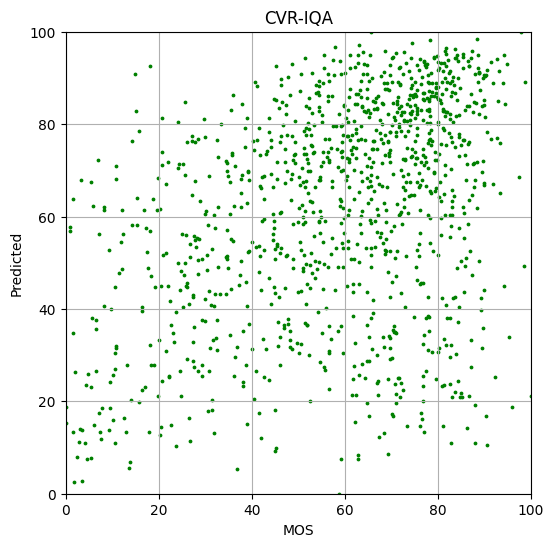

In [46]:
from tqdm import tqdm
print("num of imgs:", len(names))
print("org...")

org_preds = []
for im in tqdm(names):
    try:
        rr = obj_org.cvr_on_single_image("dataset\LIVEC/images/"+im[0] , get_random_HR_images())
        org_preds.append(rr)
    except:
        print(">>>>> ",im)
        org_preds.append(50)

org_preds_normalized = normalize_array(np.array(org_preds))
moses_normalized = normalize_array(np.array(moses))

print("round : ",stats.spearmanr( org_preds_normalized , moses_normalized)[0] , pearsonr(org_preds_normalized, moses_normalized)[0] , kendalltau(org_preds_normalized, moses_normalized)[0])





plot_scatter(moses_normalized, org_preds_normalized)

In [ ]:
from tqdm import tqdm
print("num of imgs:", len(names))
print("stackingV1...")

V1_preds = []
for im in tqdm(names):
    try:
        rr = obj_stackV1.cvr_on_single_image("dataset\LIVEC/images/"+im[0] , get_random_HR_images())
        V1_preds.append(rr)
    except:
        print(">>>>> ",im)
        V1_preds.append(50)

V1_preds_normalized = normalize_array(np.array(V1_preds))
moses_normalized = normalize_array(np.array(moses))

print("round : ",stats.spearmanr( V1_preds_normalized , moses_normalized)[0] , pearsonr(V1_preds_normalized, moses_normalized)[0] , kendalltau(V1_preds_normalized, moses_normalized)[0])





plot_scatter(moses_normalized, V1_preds_normalized)

round :  0.3881995927376767 0.44057531449666165 0.2682333651334686


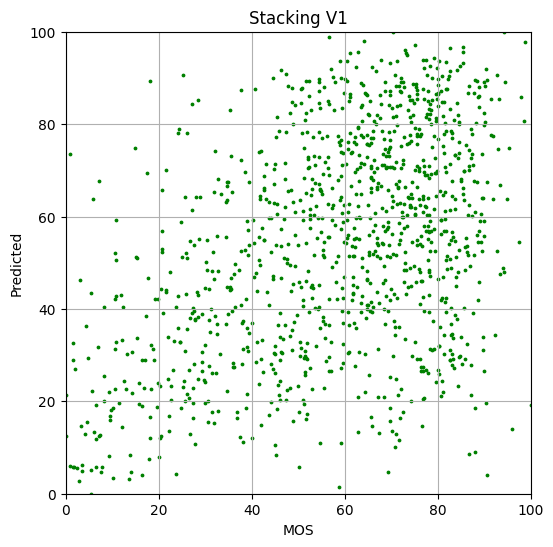

In [50]:
print("round : ",stats.spearmanr( V1_preds_normalized , moses_normalized)[0] , pearsonr(V1_preds_normalized, moses_normalized)[0] , kendalltau(V1_preds_normalized, moses_normalized)[0])

plot_scatter(moses_normalized, V1_preds_normalized,"Stacking V1")

In [ ]:
from tqdm import tqdm
print("num of imgs:", len(names))
print("stackingV2...")

V2_preds = []
for im in tqdm(names):
    try:
        rr = obj_stackV2.cvr_on_single_image("dataset\LIVEC/images/"+im[0] , get_random_HR_images())
        V2_preds.append(rr)
    except:
        print(">>>>> ",im)
        V2_preds.append(50)

V2_preds_normalized = normalize_array(np.array(V2_preds))
moses_normalized = normalize_array(np.array(moses))

print("round : ",stats.spearmanr( V2_preds_normalized , moses_normalized)[0] , pearsonr(V2_preds_normalized, moses_normalized)[0] , kendalltau(V2_preds_normalized, moses_normalized)[0])





plot_scatter(moses_normalized, V2_preds_normalized)

round :  0.3880853199421923 0.42914583900464864 0.269093210998687


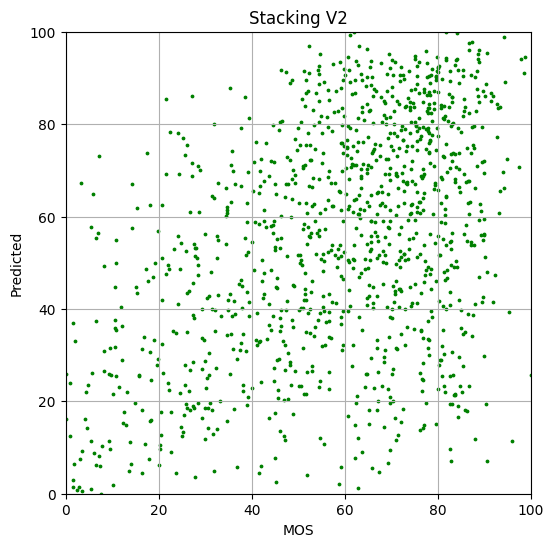

In [51]:
print("round : ",stats.spearmanr( V2_preds_normalized , moses_normalized)[0] , pearsonr(V2_preds_normalized, moses_normalized)[0] , kendalltau(V2_preds_normalized, moses_normalized)[0])

plot_scatter(moses_normalized, V2_preds_normalized, "Stacking V2")

## CSIQ

In [69]:
def read_txt_to_list(filepath):
    with open(filepath, 'r') as file:
        data = file.readlines()
    return [line.strip().split(" ")[3] for line in data[:]] , [float(line.strip().split(" ")[-1]) for line in data[:]]

# Example usage:
CS_names , CS_scores = read_txt_to_list('dataset\CSIQ/scores.txt')

len(CS_names),len(CS_scores)

(866, 866)

num of imgs: 866
org...


100%|██████████| 866/866 [08:45<00:00,  1.65it/s]

round :  0.8155263392115795 0.8313231587180547 0.6404057392291402


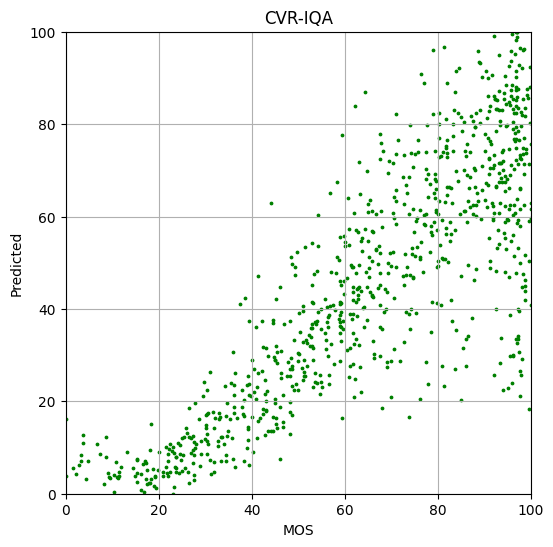

In [70]:
from tqdm import tqdm
print("num of imgs:", len(CS_names))
print("org...")

CS_org_preds = []
for im in tqdm(CS_names):
    try:
        rr = obj_org.cvr_on_single_image("dataset\CSIQ/"+im , get_random_HR_images())
        CS_org_preds.append(rr)
    except:
        print(">>>>> ",im)
        CS_org_preds.append(50)

CS_org_preds_normalized = normalize_array(np.array(CS_org_preds))
CS_scores_normalized = 100 - normalize_array(np.array(CS_scores))

print("round : ",stats.spearmanr( CS_org_preds_normalized , CS_scores_normalized)[0] , pearsonr(CS_org_preds_normalized, CS_scores_normalized)[0] , kendalltau(CS_org_preds_normalized, CS_scores_normalized)[0])





plot_scatter(CS_scores_normalized, CS_org_preds_normalized)

num of imgs: 866
Stacking V1...


  0%|          | 0/866 [00:00<?, ?it/s]

100%|██████████| 866/866 [07:12<00:00,  2.00it/s]

round :  0.7889735197593541 0.8051334936691903 0.6053196985869924


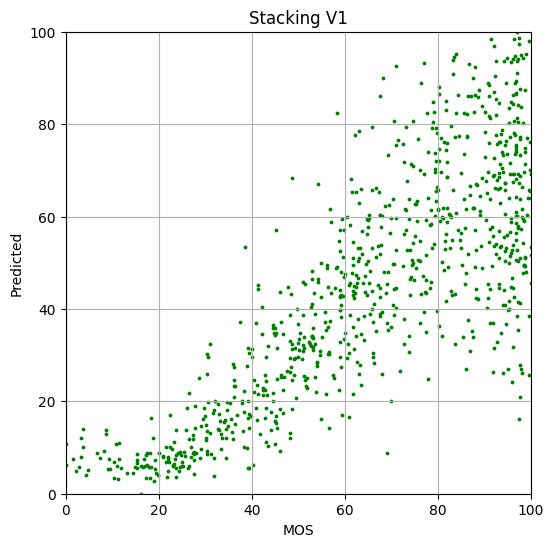

In [71]:
from tqdm import tqdm
print("num of imgs:", len(CS_names))
print("Stacking V1...")

CS_V1_preds = []
for im in tqdm(CS_names):
    try:
        rr = obj_stackV1.cvr_on_single_image("dataset\CSIQ/"+im , get_random_HR_images())
        CS_V1_preds.append(rr)
    except:
        print(">>>>> ",im)
        CS_V1_preds.append(50)

CS_V1_preds_normalized = normalize_array(np.array(CS_V1_preds))
CS_scores_normalized = 100 - normalize_array(np.array(CS_scores))

print("round : ",stats.spearmanr( CS_V1_preds_normalized , CS_scores_normalized)[0] , pearsonr(CS_V1_preds_normalized, CS_scores_normalized)[0] , kendalltau(CS_V1_preds_normalized, CS_scores_normalized)[0])





plot_scatter(CS_scores_normalized, CS_V1_preds_normalized, "Stacking V1")

num of imgs: 866
Stacking V2...


100%|██████████| 866/866 [07:13<00:00,  2.00it/s]

round :  0.7869148385308298 0.7964844172346379 0.6009272640137597


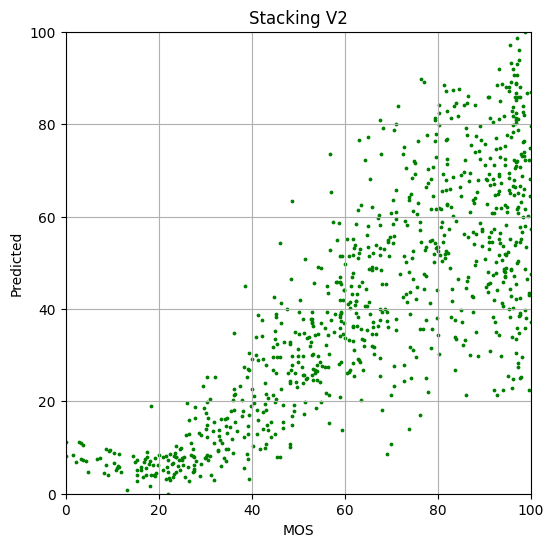

In [72]:
from tqdm import tqdm
print("num of imgs:", len(CS_names))
print("Stacking V2...")

CS_v2_preds = []
for im in tqdm(CS_names):
    try:
        rr = obj_stackV2.cvr_on_single_image("dataset\CSIQ/"+im , get_random_HR_images())
        CS_v2_preds.append(rr)
    except:
        print(">>>>> ",im)
        CS_v2_preds.append(50)

CS_v2_preds_normalized = normalize_array(np.array(CS_v2_preds))
CS_scores_normalized = 100 - normalize_array(np.array(CS_scores))

print("round : ",stats.spearmanr( CS_v2_preds_normalized , CS_scores_normalized)[0] , pearsonr(CS_v2_preds_normalized, CS_scores_normalized)[0] , kendalltau(CS_v2_preds_normalized, CS_scores_normalized)[0])





plot_scatter(CS_scores_normalized, CS_v2_preds_normalized, "Stacking V2")

## TID:

In [40]:
def read_and_split_txt_file(file_path):
    
    with open(file_path, 'r') as file:
        data = file.readlines()
    return [float(line.strip().split(" ")[0]) for line in data[:]] , [line.strip().split(" ")[1] for line in data[:]]



TID_MOS , TID_names = read_and_split_txt_file("dataset/TID2013/mos_with_names.txt")

len(TID_MOS) , len(TID_names)

(3000, 3000)

num of imgs: 3000
org...


100%|██████████| 3000/3000 [25:59<00:00,  1.92it/s]

round :  0.6801056672728812 0.689422954294885 0.49767419718941447


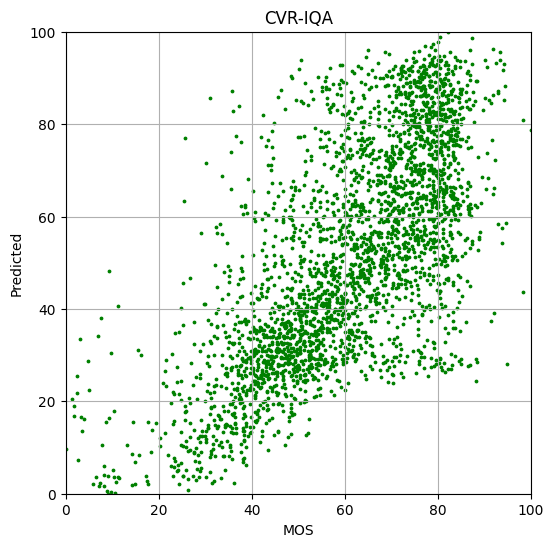

In [41]:
from tqdm import tqdm
print("num of imgs:", len(TID_names))
print("org...")

TID_org_preds = []
for im in tqdm(TID_names):
    try:
        rr = obj_org.cvr_on_single_image("dataset\TID2013\distorted_images/"+im , get_random_HR_images())
        TID_org_preds.append(rr)
    except:
        print(">>>>> ",im)
        TID_org_preds.append(50)

TID_org_preds_normalized = normalize_array(np.array(TID_org_preds))
TID_scores_normalized = normalize_array(np.array(TID_MOS))

print("round : ",stats.spearmanr( TID_org_preds_normalized , TID_scores_normalized)[0] , pearsonr(TID_org_preds_normalized, TID_scores_normalized)[0] , kendalltau(TID_org_preds_normalized, TID_scores_normalized)[0])





plot_scatter(TID_scores_normalized, TID_org_preds_normalized)

num of imgs: 3000
Stacking V1...


100%|██████████| 3000/3000 [25:00<00:00,  2.00it/s]

round :  0.6601678773854893 0.6737559281467709 0.4826067937005411


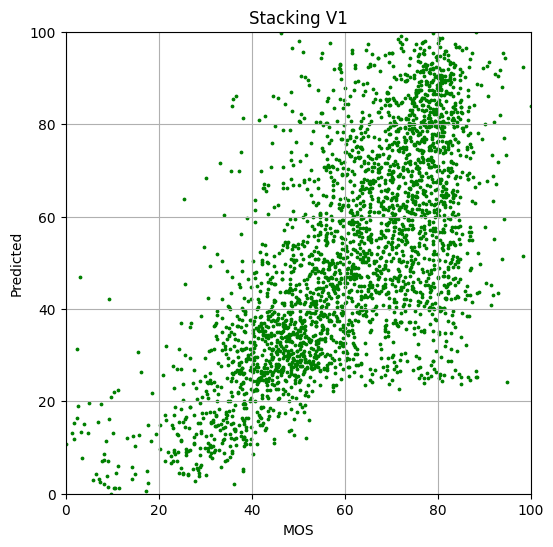

In [42]:
import time
time.sleep(300)  # Sleep for 5 minutes (300 seconds)

from tqdm import tqdm
print("num of imgs:", len(TID_names))
print("Stacking V1...")

TID_V1_preds = []
for im in tqdm(TID_names):
    try:
        rr = obj_stackV1.cvr_on_single_image("dataset\TID2013\distorted_images/"+im , get_random_HR_images())
        TID_V1_preds.append(rr)
    except:
        print(">>>>> ",im)
        TID_V1_preds.append(50)

TID_V1_preds_normalized = normalize_array(np.array(TID_V1_preds))
TID_scores_normalized =  normalize_array(np.array(TID_MOS))

print("round : ",stats.spearmanr( TID_V1_preds_normalized , TID_scores_normalized)[0] , pearsonr(TID_V1_preds_normalized, TID_scores_normalized)[0] , kendalltau(TID_V1_preds_normalized, TID_scores_normalized)[0])





plot_scatter(TID_scores_normalized, TID_V1_preds_normalized, "Stacking V1")

num of imgs: 3000
Stacking V2...


100%|██████████| 3000/3000 [25:02<00:00,  2.00it/s]

round :  0.6681280986774558 0.6822846962768716 0.48807859787670876


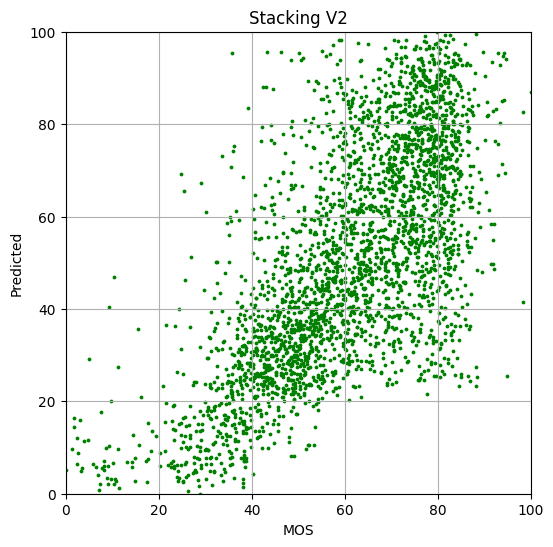

In [43]:
import time
time.sleep(300)

from tqdm import tqdm
print("num of imgs:", len(TID_names))
print("Stacking V2...")

TID_v2_preds = []
for im in tqdm(TID_names):
    try:
        rr = obj_stackV2.cvr_on_single_image("dataset\TID2013\distorted_images/"+im , get_random_HR_images())
        TID_v2_preds.append(rr)
    except:
        print(">>>>> ",im)
        TID_v2_preds.append(50)

TID_v2_preds_normalized = normalize_array(np.array(TID_v2_preds))
TID_scores_normalized =  normalize_array(np.array(TID_MOS))

print("round : ",stats.spearmanr( TID_v2_preds_normalized , TID_scores_normalized)[0] , pearsonr(TID_v2_preds_normalized, TID_scores_normalized)[0] , kendalltau(TID_v2_preds_normalized, TID_scores_normalized)[0])





plot_scatter(TID_scores_normalized, TID_v2_preds_normalized, "Stacking V2")